In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

In [2]:
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

def linear(x, m, b):
    return m * x + b

def gsin(theta, g):
    return g*np.sin(np.radians(theta))

def hiperbola_mass (m, m2, F):
    a = F/(m2+m)
    return a

def hiperbola(x, a, b, c):
    return a/(b+x)+c*x

In [3]:
# define function to clean up data 

# Clean data by removing NaN and Inf values
def clean_data(x, y):
    # Convert to numpy arrays if they're not already
    x_np = np.array(x)
    y_np = np.array(y)
    
    # Create mask for valid values (not NaN or Inf)
    mask = ~np.isnan(x_np) & ~np.isnan(y_np) & ~np.isinf(x_np) & ~np.isinf(y_np)
    
    # Apply mask
    return x_np[mask], y_np[mask]

In [4]:
def load_excel_to_df(data):
    """
    Loads an Excel file named "{data}.xlsx" (with skiprows=1) into a dataframe.
    The dataframe is assigned to a global variable named df_{data}.
    
    Parameters:
        data (str): The base name of the Excel file (without ".xlsx").
    """
    filename = f"{data}.xlsx"
    try:
        df = pd.read_excel(filename, skiprows=1)
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        exit()
    globals()[f"df_{data}"] = df
    return df

In [5]:
df_317g = load_excel_to_df("317g")
df_417g = load_excel_to_df("417g")
df_517g = load_excel_to_df("517g")
df_617g = load_excel_to_df("617g")
df_717g = load_excel_to_df("717g")

In [6]:
df_317g.head()

,t,x,vx,ax
0,0.00000,0.007518,NaN,NaN
1,0.01667,0.008046,0.029760,NaN
2,0.03333,0.008510,0.051930,-0.05368
3,0.04983,0.009768,0.040540,-0.91500
4,0.06633,0.009848,0.007603,-0.51500


# 1) $x$ vs $t$

In [7]:
t_317g = df_317g['t'].to_numpy()
x_317g = df_317g['x'].to_numpy()

t_417g = df_417g['t'].to_numpy()
x_417g = df_417g['x'].to_numpy()

t_517g = df_517g['t'].to_numpy()
x_517g = df_517g['x'].to_numpy()

t_617g = df_617g['t'].to_numpy()
x_617g = df_617g['x'].to_numpy()

t_717g = df_717g['t'].to_numpy()
x_717g = df_717g['x'].to_numpy()

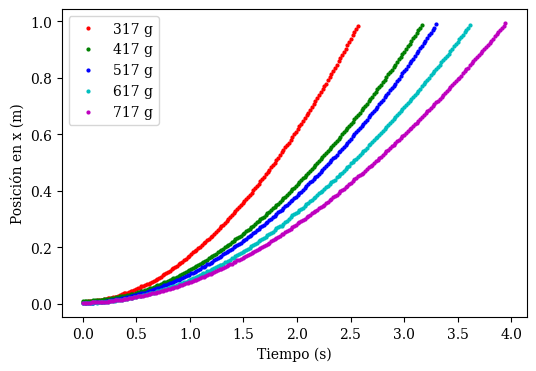

In [8]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(t_317g, x_317g, marker='o', markersize=2 , linestyle='None', color='r', label='317 g')
plt.plot(t_417g, x_417g, marker='o', markersize=2 , linestyle='None', color='g', label='417 g')
plt.plot(t_517g, x_517g, marker='o', markersize=2 , linestyle='None', color='b', label='517 g')
plt.plot(t_617g, x_617g, marker='o', markersize=2 , linestyle='None', color='c', label='617 g')
plt.plot(t_717g, x_717g, marker='o', markersize=2 , linestyle='None', color='m', label='717 g')


# Add labels, title, legend (if needed)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición en x (m)")
#plt.title("Plot with Data from Two Sources")
plt.legend()  # Show the legend


# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
# yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']



# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("x-vs-t.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

# 2) $v_x$ vs. $t$

In [9]:
# Adapt column names if different
t_317g = df_317g['t'].to_numpy()
vx_317g = df_317g['vx'].to_numpy()
t_317g, vx_317g = clean_data(t_317g, vx_317g)

t_417g = df_417g['t'].to_numpy()
vx_417g = df_417g['vx'].to_numpy()
t_417g, vx_417g = clean_data(t_417g, vx_417g)

t_517g = df_517g['t'].to_numpy()
vx_517g = df_517g['vx'].to_numpy()
t_517g, vx_517g = clean_data(t_517g, vx_517g)

t_617g = df_617g['t'].to_numpy()
vx_617g = df_617g['vx'].to_numpy()
t_617g, vx_617g = clean_data(t_617g, vx_617g)

t_717g = df_717g['t'].to_numpy()
vx_717g = df_717g['vx'].to_numpy()
t_717g, vx_717g = clean_data(t_717g, vx_717g)

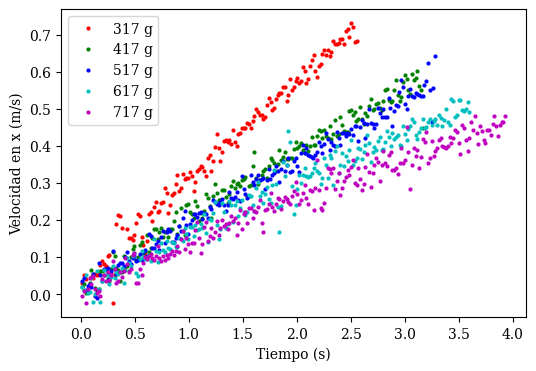

In [10]:
#define the function for the regression curve

# popt317, pcov317 = opt.curve_fit(linear, t_317g, vx_317g)
# print("Equation for 317g: y = {:.2f}x + {:.2f}".format(popt317[0], popt317[1]))

# popt417, pcov417 = opt.curve_fit(linear, t_417g, vx_417g)
# print("Equation for 417g: y = {:.2f}x + {:.2f}".format(popt417[0], popt417[1]))

# popt517, pcov517 = opt.curve_fit(linear, t_517g, vx_517g)
# print("Equation for 517g: y = {:.2f}x + {:.2f}".format(popt517[0], popt517[1]))

# popt617, pcov617 = opt.curve_fit(linear, t_617g, vx_617g)
# print("Equation for 617g: y = {:.2f}x + {:.2f}".format(popt617[0], popt617[1]))

# popt717, pcov717 = opt.curve_fit(linear, t_717g, vx_717g)
# print("Equation for 717g: y = {:.2f}x + {:.2f}".format(popt717[0], popt717[1]))



plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(t_317g, vx_317g, marker='o', markersize=2 , linestyle='None', color='r', label='317 g')
plt.plot(t_417g, vx_417g, marker='o', markersize=2 , linestyle='None', color='g', label='417 g')
plt.plot(t_517g, vx_517g, marker='o', markersize=2 , linestyle='None', color='b', label='517 g')
plt.plot(t_617g, vx_617g, marker='o', markersize=2 , linestyle='None', color='c', label='617 g')
plt.plot(t_717g, vx_717g, marker='o', markersize=2 , linestyle='None', color='m', label='717 g')



#lineas de regresion

# plt.plot(t_317g, linear(t_317g, *popt317), color='r', linestyle='dashed', linewidth=2, label='317 g')
# plt.plot(t_417g, linear(t_417g, *popt417), color='g', linestyle='dashed', linewidth=2, label='417 g')
# plt.plot(t_517g, linear(t_517g, *popt517), color='b', linestyle='dashed', linewidth=2, label='517 g')
# plt.plot(t_617g, linear(t_617g, *popt617), color='c', linestyle='dashed', linewidth=2, label='617 g')
# plt.plot(t_717g, linear(t_717g, *popt717), color='m', linestyle='dashed', linewidth=2, label='717 g')



# Add labels, title, legend (if needed)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad en x (m/s)")
#plt.title("Plot with Data from Two Sources")
plt.legend()  # Show the legend


# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [1.0, 2.0, 3.0, 4.0]
# yticks_labels = ['1.0', '2.0', '3.0', '4.0']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("vx-vs-t.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


Equation for 317g: y = 0.27x + 0.03
Equation for 417g: y = 0.18x + 0.03
Equation for 517g: y = 0.17x + 0.02
Equation for 617g: y = 0.14x + 0.02
Equation for 717g: y = 0.12x + 0.02


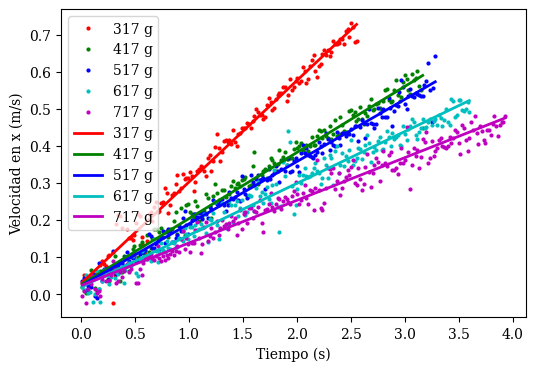

In [11]:
# define the function for the regression curve

popt317, pcov317 = opt.curve_fit(linear, t_317g, vx_317g)
print("Equation for 317g: y = {:.2f}x + {:.2f}".format(popt317[0], popt317[1]))

popt417, pcov417 = opt.curve_fit(linear, t_417g, vx_417g)
print("Equation for 417g: y = {:.2f}x + {:.2f}".format(popt417[0], popt417[1]))

popt517, pcov517 = opt.curve_fit(linear, t_517g, vx_517g)
print("Equation for 517g: y = {:.2f}x + {:.2f}".format(popt517[0], popt517[1]))

popt617, pcov617 = opt.curve_fit(linear, t_617g, vx_617g)
print("Equation for 617g: y = {:.2f}x + {:.2f}".format(popt617[0], popt617[1]))

popt717, pcov717 = opt.curve_fit(linear, t_717g, vx_717g)
print("Equation for 717g: y = {:.2f}x + {:.2f}".format(popt717[0], popt717[1]))



plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(t_317g, vx_317g, marker='o', markersize=2 , linestyle='None', color='r', label='317 g')
plt.plot(t_417g, vx_417g, marker='o', markersize=2 , linestyle='None', color='g', label='417 g')
plt.plot(t_517g, vx_517g, marker='o', markersize=2 , linestyle='None', color='b', label='517 g')
plt.plot(t_617g, vx_617g, marker='o', markersize=2 , linestyle='None', color='c', label='617 g')
plt.plot(t_717g, vx_717g, marker='o', markersize=2 , linestyle='None', color='m', label='717 g')



#lineas de regresion

plt.plot(t_317g, linear(t_317g, *popt317), color='r', linestyle='-', linewidth=2, label='317 g')
plt.plot(t_417g, linear(t_417g, *popt417), color='g', linestyle='-', linewidth=2, label='417 g')
plt.plot(t_517g, linear(t_517g, *popt517), color='b', linestyle='-', linewidth=2, label='517 g')
plt.plot(t_617g, linear(t_617g, *popt617), color='c', linestyle='-', linewidth=2, label='617 g')
plt.plot(t_717g, linear(t_717g, *popt717), color='m', linestyle='-', linewidth=2, label='717 g')



# Add labels, title, legend (if needed)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad en x (m/s)")
#plt.title("Plot with Data from Two Sources")
plt.legend()  # Show the legend


# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [1.0, 2.0, 3.0, 4.0]
# yticks_labels = ['1.0', '2.0', '3.0', '4.0']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("vx-vs-t-ajuste.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


# 3) $a_y$ vs $t$

Averages: 
317 g:  0.2539145460526316 m/s²
417 g:  0.17251948979591833 m/s²
517 g:  0.14984302645502648 m/s²
617 g:  0.13519466046511627 m/s²
717 g:  0.12109668085106383 m/s²


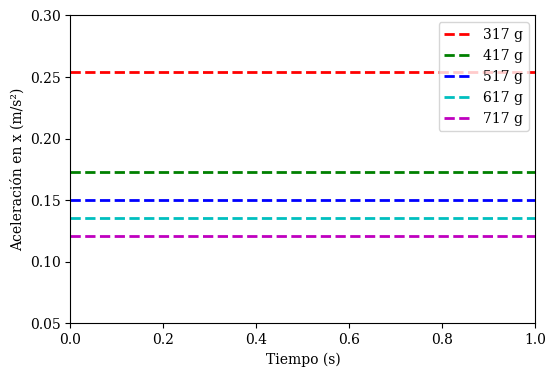

In [12]:
# Adapt column names if different

t_317g = df_317g['t']
ax_317g = df_317g['ax']
t_317g, ax_317g = clean_data(t_317g, ax_317g)
ax_317g_average = ax_317g.mean()

t_417g = df_417g['t']
ax_417g = df_417g['ax']
t_417g, ax_417g = clean_data(t_417g, ax_417g)
ax_417g_average_temp = ax_417g.mean()



t_517g = df_517g['t']
ax_517g = df_517g['ax']
t_517g, ax_517g = clean_data(t_517g, ax_517g)
ax_517g_average_temp = ax_517g.mean()

t_617g = df_617g['t']
ax_617g = df_617g['ax']
t_617g, ax_617g = clean_data(t_617g, ax_617g)
ax_617g_average = ax_617g.mean()

t_717g = df_717g['t']
ax_717g = df_717g['ax']
t_717g, ax_717g = clean_data(t_717g, ax_717g)
ax_717g_average = ax_717g.mean()

ax_417g_average = ax_517g_average_temp
ax_517g_average = ax_417g_average_temp


print("Averages: ")
print("317 g: ", ax_317g_average, "m/s²")
print("417 g: ", ax_417g_average, "m/s²")
print("517 g: ", ax_517g_average, "m/s²")
print("617 g: ", ax_617g_average, "m/s²")
print("717 g: ", ax_717g_average, "m/s²")


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
# plt.plot(t_5grados, ax_5grados, marker='o', markersize=2 , linestyle='None', color='r', label='5°')
# plt.plot(t_10grados, ax_10grados, marker='o', markersize=2 , linestyle='None', color='g', label='10°')
# plt.plot(t_15grados, ax_15grados, marker='o', markersize=2 , linestyle='None', color='b', label='15°')
# plt.plot(t_20grados, ax_20grados, marker='o', markersize=2 , linestyle='None', color='c', label='20°')
# plt.plot(t_25grados, ax_25grados, marker='o', markersize=2 , linestyle='None', color='m', label='25°')


plt.axhline(y=ax_317g_average, color='r', linestyle='dashed', linewidth=2, label='317 g')
plt.axhline(y=ax_417g_average, color='g', linestyle='dashed', linewidth=2, label='417 g')
plt.axhline(y=ax_517g_average, color='b', linestyle='dashed', linewidth=2, label='517 g')
plt.axhline(y=ax_617g_average, color='c', linestyle='dashed', linewidth=2, label='617 g')
plt.axhline(y=ax_717g_average, color='m', linestyle='dashed', linewidth=2, label='717 g')

#define the limit for the y axis
plt.ylim(0.05, 0.3)

#plotting ticks

# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']
yticks_positions = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
yticks_labels = ['0.05', '0.10', '0.15', '0.20', '0.25', '0.30']

# plt.xticks(xticks_positions, xticks_labels)
plt.yticks(yticks_positions, yticks_labels)

# Add labels, title, legend (if needed)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración en x (m/s²)")
#plt.title("Plot with Data from Two Sources")
plt.legend()  # Show the legend


# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("ax-vs-t.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


# 4) $a$ vs $m$

In [13]:
g = 9.8
m2 = 0.001 #g
F_neta = m2*g

Parabola coefficients for balon: [ 0.03914739 -0.1454644   0.07857485]


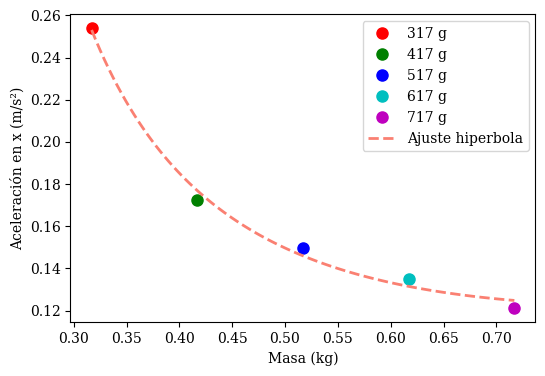

In [23]:
# plotting the acceleration vs mass

ax_averages = [ax_317g_average, ax_417g_average, ax_517g_average, ax_617g_average, ax_717g_average]
mass = [0.317, 0.417, 0.517, 0.617, 0.717]

plt.plot(mass[0], ax_averages[0], marker='o', markersize=8 , linestyle='None', color='r', label='317 g')
plt.plot(mass[1], ax_averages[1], marker='o', markersize=8 , linestyle='None', color='g', label='417 g')
plt.plot(mass[2], ax_averages[2], marker='o', markersize=8 , linestyle='None', color='b', label='517 g')
plt.plot(mass[3], ax_averages[3], marker='o', markersize=8 , linestyle='None', color='c', label='617 g')
plt.plot(mass[4], ax_averages[4], marker='o', markersize=8 , linestyle='None', color='m', label='717 g')


# m = np.linspace(min(mass), max(mass), 100)
# m = m + m2
# y = hiperbola_mass(m, m2, F_neta)

# plt.plot(m, y)

popt, pcov = opt.curve_fit(hiperbola, mass, ax_averages)
print("Parabola coefficients for balon:", popt)

m = np.linspace(min(mass), max(mass), 100)
y = hiperbola(m, *popt)
plt.plot(m, y, color='salmon', linestyle='dashed', linewidth=2, label='Ajuste hiperbola')


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# xticks_positions = [0.2, 0.4, 0.6, 0.8]
# xticks_labels = ['0.2', '0.4', '0.6', '0.8']

# # plt.xticks(xticks_positions, xticks_labels)
# plt.xticks(xticks_positions, xticks_labels)
# Add labels, title, legend (if needed)
plt.xlabel("Masa (kg)")
plt.ylabel("Aceleración en x (m/s²)")

plt.legend()  # Show the legend

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("ax-vs-m.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()


Linear coefficients for balon: [0.07351582 0.0120961 ]


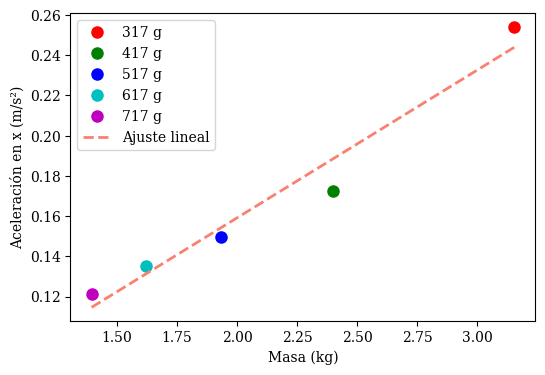

In [26]:
# plotting the acceleration vs mass

ax_averages = [ax_317g_average, ax_417g_average, ax_517g_average, ax_617g_average, ax_717g_average]
mass_inv = [1/0.317, 1/0.417, 1/0.517, 1/0.617, 1/0.717]

plt.plot(mass_inv[0], ax_averages[0], marker='o', markersize=8 , linestyle='None', color='r', label='317 g')
plt.plot(mass_inv[1], ax_averages[1], marker='o', markersize=8 , linestyle='None', color='g', label='417 g')
plt.plot(mass_inv[2], ax_averages[2], marker='o', markersize=8 , linestyle='None', color='b', label='517 g')
plt.plot(mass_inv[3], ax_averages[3], marker='o', markersize=8 , linestyle='None', color='c', label='617 g')
plt.plot(mass_inv[4], ax_averages[4], marker='o', markersize=8 , linestyle='None', color='m', label='717 g')



# plt.plot(m, y)

popt, pcov = opt.curve_fit(linear, mass_inv, ax_averages)
print("Linear coefficients for balon:", popt)

m = np.linspace(min(mass_inv), max(mass_inv), 100)
y = linear(m, *popt)
plt.plot(m, y, color='salmon', linestyle='dashed', linewidth=2, label='Ajuste lineal')


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# xticks_positions = [0.2, 0.4, 0.6, 0.8]
# xticks_labels = ['0.2', '0.4', '0.6', '0.8']

# # plt.xticks(xticks_positions, xticks_labels)
# plt.xticks(xticks_positions, xticks_labels)
# Add labels, title, legend (if needed)
plt.xlabel("Masa (kg)")
plt.ylabel("Aceleración en x (m/s²)")

plt.legend()  # Show the legend

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("ax-vs-m.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()